# DNN on CIFAR10
In this exercise you are supposed to do a DNN with dense layers. The task is to train a very deep DNN and make predictions on the CIFAR10 dataset. This is a very well known dataset used as a benchmark in computer vision.

* Create a 20 layered NN with 100 neurons
* Use He initialization
* Use ELU activation function
* USe Nadam
* Use early stopping

In [1]:
import tensorflow as tf
from functools import partial
tf.random.set_seed(42)

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [3]:
x_train.shape, x_train[0, :, :].max(), x_train[0, :, :].min()

((50000, 32, 32, 3), 255, 0)

In [4]:
x_train, x_test = x_train/255.0, x_test/255.0

# Create model

In [5]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 ** (epoch/s)
    return exponential_decay_fn

In [6]:
def create_dnn(activation='elu', 
               kernel_initializer='he_normal', 
               units=100,
               n_layers=20, 
               batch_normalization=False):
    
    partial_dnn = partial(tf.keras.layers.Dense,
                          activation=activation, 
                          kernel_initializer=kernel_initializer)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten(input_shape=[32, 32, 3]))
    
    for i in range(n_layers):
        model.add(partial_dnn(units))
        if batch_normalization:
            model.add(tf.keras.layers.BatchNormalization())
            
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    optimizer = tf.keras.optimizers.Nadam()

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model
    

In [7]:
model = create_dnn()

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1

# Train Model

In [9]:
exponential_decay_fn = exponential_decay(lr0=0.01, s=10)
exp_schedule = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)

early_stopping = tf.keras.callbacks.EarlyStopping(patience=10)


callbacks = [early_stopping,
             exp_schedule]

history = model.fit(x_train, y_train, 
                    validation_data=(x_test, y_test), 
                    epochs=100, batch_size=32, 
                    callbacks=callbacks)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 20s 405us/sample - loss: 2.6669 - accuracy: 0.0983 - val_loss: 2.3437 - val_accuracy: 0.1000
Epoch 2/100
50000/50000 [==============================] - 17s 331us/sample - loss: 2.3330 - accuracy: 0.1012 - val_loss: 2.3369 - val_accuracy: 0.1000
Epoch 3/100
50000/50000 [==============================] - 17s 343us/sample - loss: 2.3300 - accuracy: 0.1018 - val_loss: 2.3196 - val_accuracy: 0.1000
Epoch 4/100
50000/50000 [==============================] - 18s 351us/sample - loss: 2.3261 - accuracy: 0.0992 - val_loss: 2.3265 - val_accuracy: 0.1000
Epoch 5/100
50000/50000 [==============================] - 17s 344us/sample - loss: 2.3222 - accuracy: 0.0993 - val_loss: 2.3438 - val_accuracy: 0.1000
Epoch 6/100
50000/50000 [==============================] - 17s 343us/sample - loss: 2.3206 - accuracy: 0.0993 - val_loss: 2.3185 - val_accuracy: 0.1000
Epoch 7/100
50000/50000 [=============

50000/50000 [==============================] - 17s 342us/sample - loss: 1.5482 - accuracy: 0.4426 - val_loss: 1.5993 - val_accuracy: 0.4214
Epoch 55/100
50000/50000 [==============================] - 17s 334us/sample - loss: 1.5482 - accuracy: 0.4425 - val_loss: 1.5993 - val_accuracy: 0.4214
Epoch 56/100
50000/50000 [==============================] - 17s 336us/sample - loss: 1.5482 - accuracy: 0.4425 - val_loss: 1.5993 - val_accuracy: 0.4214
Epoch 57/100
50000/50000 [==============================] - 17s 340us/sample - loss: 1.5482 - accuracy: 0.4426 - val_loss: 1.5993 - val_accuracy: 0.4214
Epoch 58/100
50000/50000 [==============================] - 17s 349us/sample - loss: 1.5482 - accuracy: 0.4426 - val_loss: 1.5993 - val_accuracy: 0.4214
Epoch 59/100
50000/50000 [==============================] - 17s 335us/sample - loss: 1.5482 - accuracy: 0.4425 - val_loss: 1.5993 - val_accuracy: 0.4214
Epoch 60/100
50000/50000 [==============================] - 17s 335us/sample - loss: 1.5482 - a

In [10]:
import pandas as pd
import matplotlib.pyplot as plt


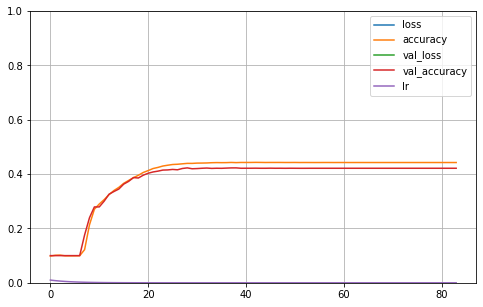

In [11]:
pd.DataFrame(history.history).plot(figsize=(8, 5), grid=True)
plt.gca().set_ylim(0, 1)
plt.show();